<a href="https://colab.research.google.com/github/Nyawira12/Unsupervised-Learning-with-R/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding 

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into four parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

# 2. Success Metrics

Check whether there are any anomalies in the given sales dataset. The objective of this task being fraud detection.

# 3. Understanding the Context

The retail space is in Kenya highly competitive, survival strategies depends  on the enity's ability to retain and grow its market shares. This makes an analysis of relevant marketing strategies a possible source of competitive advantage. This section will focus on association analysis. 

# 4. Expermental Design

1. Import Libraries & Read Data
2. EDA
3. Implementing the Solution
4. Conclusion

# 5. Reading the data and importing the required libraries.

In [1]:
# install the anomalize package
install.packages("anomalize")
library(anomalize)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘TTR’, ‘prodlim’, ‘future’, ‘globals’, ‘quadprog’, ‘quantmod’, ‘gower’, ‘ipred’, ‘furrr’, ‘modeldata’, ‘hexbin’, ‘data.table’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘xts’, ‘zoo’, ‘slider’, ‘anytime’, ‘timeDate’, ‘forecast’, ‘timetk’, ‘sweep’, ‘tibbletime’


══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>



In [2]:
# Load tidyverse and tibbletime
library(tidyverse)
library(tibbletime)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘tibbletime’


The following object is masked from ‘package:stats’:

    filter




In [3]:
# install dplyr package
install.packages("dplyr")
require(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:

#we also install a visualisation package 
if (!require(devtools)) install.packages("devtools")
devtools::install_github("boxuancui/DataExplorer")

Loading required package: devtools

Loading required package: usethis




colorspace (1.4-1 -> 2.0-0) [CRAN]
rstudioapi (0.11  -> 0.13 ) [CRAN]
waldo      (0.2.2 -> 0.2.3) [CRAN]
igraph     (NA    -> 1.2.6) [CRAN]
plyr       (NA    -> 1.8.6) [CRAN]
networkD3  (NA    -> 0.4  ) [CRAN]
gridExtra  (NA    -> 2.3  ) [CRAN]
reshape2   (NA    -> 1.4.4) [CRAN]


Installing 8 packages: colorspace, rstudioapi, waldo, igraph, plyr, networkD3, gridExtra, reshape2

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpW7efjB/remotes3b71ebb27a/boxuancui-DataExplorer-79dec59/DESCRIPTION’
─  preparing ‘DataExplorer’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘DataExplorer_0.8.2.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [6]:
install.packages('devtools') 
devtools::install_github("business-science/anomalize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




cpp11 (0.2.3 -> 0.2.4) [CRAN]


Installing 1 packages: cpp11

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpW7efjB/remotes3b4eb79a01/business-science-anomalize-de0d706/DESCRIPTION’
─  preparing ‘anomalize’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘anomalize_0.2.2.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
library(tidyverse)
library(dplyr)
library(tibbletime)
library(DataExplorer)
library(devtools)
library(usethis)
install.packages("gridExtra")
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [8]:
# load the data set 
path = "/content/Supermarket_Sales_Forecasting - Sales.csv"
Df3 <- read.csv(path)



# 6. EDA

In [9]:
# find the first 5 rows
head(Df3, 5)

,Date,Sales
,<chr>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785


In [10]:
# check the last 5 rows
tail(Df3, 5)

,Date,Sales
,<chr>,<dbl>
996,1/29/2019,42.3675
997,3/2/2019,1022.4900
998,2/9/2019,33.4320
999,2/22/2019,69.1110
1000,2/18/2019,649.2990


In [11]:
# find the column names
print(names(Df3))

[1] "Date"  "Sales"


We will want to remove the spaces between the column names shown above and have them be lower case

In [12]:
# check type of data set
class(Df3)

[1] "data.frame"

In [13]:
# find the column data types 
str(Df3)

'data.frame':	1000 obs. of  2 variables:
 $ Date : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


We observe that we the date column is a factor we will need to convert it to date type.

In [14]:
# find out how many rows and columns are present in the data set
dim(Df3)

[1] 1000    2

There are 1000 rows and 2 columns

In [15]:
# check if there are any duplicates
anyDuplicated(Df3)

[1] 0

There are no duplicate values

In [16]:
# check if there are any missing values
colSums(is.na(Df3))

Date Sales 
    0     0

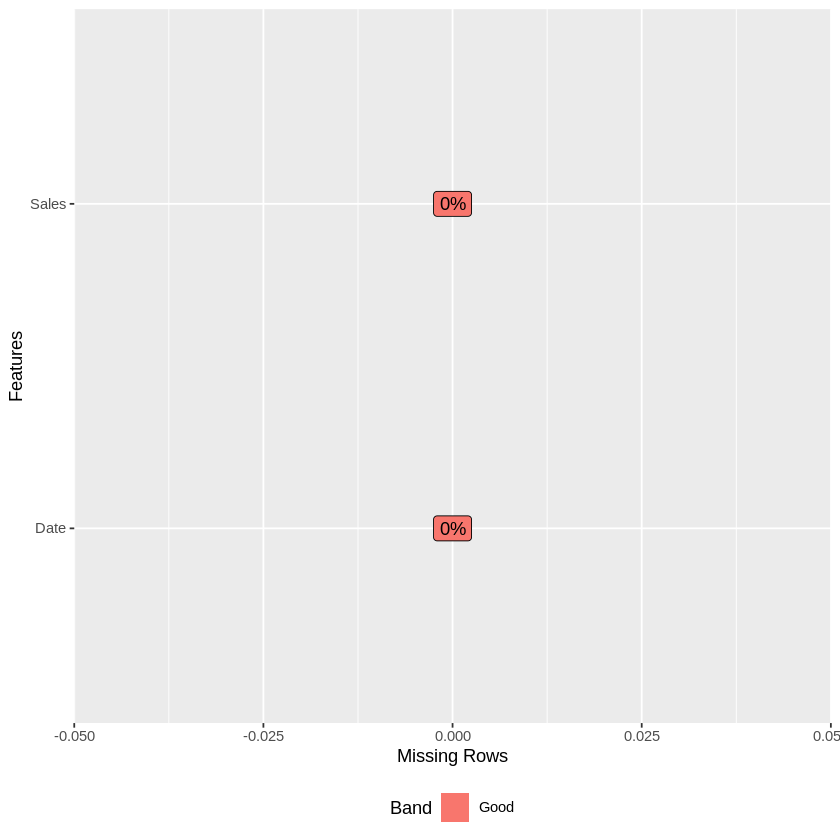

In [17]:
# a visualization to show percentage of missing values in our data set
plot_missing(Df3)

No missing values

In [18]:
# Install Lubridate package for date time data
install.packages('lubridate')
library(lubridate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [19]:
# frequency of date
datee <- table(Df3$Date)
datee


 1/1/2019 1/10/2019 1/11/2019 1/12/2019 1/13/2019 1/14/2019 1/15/2019 1/16/2019 
       12         9         8        11        10        13        13        10 
1/17/2019 1/18/2019 1/19/2019  1/2/2019 1/20/2019 1/21/2019 1/22/2019 1/23/2019 
       11         9        16         8        10         8         7        17 
1/24/2019 1/25/2019 1/26/2019 1/27/2019 1/28/2019 1/29/2019  1/3/2019 1/30/2019 
       13        17        17        14        14        12         8         9 
1/31/2019  1/4/2019  1/5/2019  1/6/2019  1/7/2019  1/8/2019  1/9/2019  2/1/2019 
       14         6        12         9         9        18         8         6 
2/10/2019 2/11/2019 2/12/2019 2/13/2019 2/14/2019 2/15/2019 2/16/2019 2/17/2019 
       11         8         8         8         8        19         8        13 
2/18/2019 2/19/2019  2/2/2019 2/20/2019 2/21/2019 2/22/2019 2/23/2019 2/24/2019 
        7         9        14        10         6        11         8         9 
2/25/2019 2/26/2019 2/27/20

From the above frequency we observe that the most common date occurence is 2/7/2019 with a frequency of 20.  The lowest frequency is 7 and is seen on multiple dates.

In [20]:
Df3$Date <- as.Date(Df3$Date, "%m/%d/%y")
head(Df3)

,Date,Sales
,<date>,<dbl>
1,2020-01-05,548.9715
2,2020-03-08,80.2200
3,2020-03-03,340.5255
4,2020-01-27,489.0480
5,2020-02-08,634.3785
6,2020-03-25,627.6165


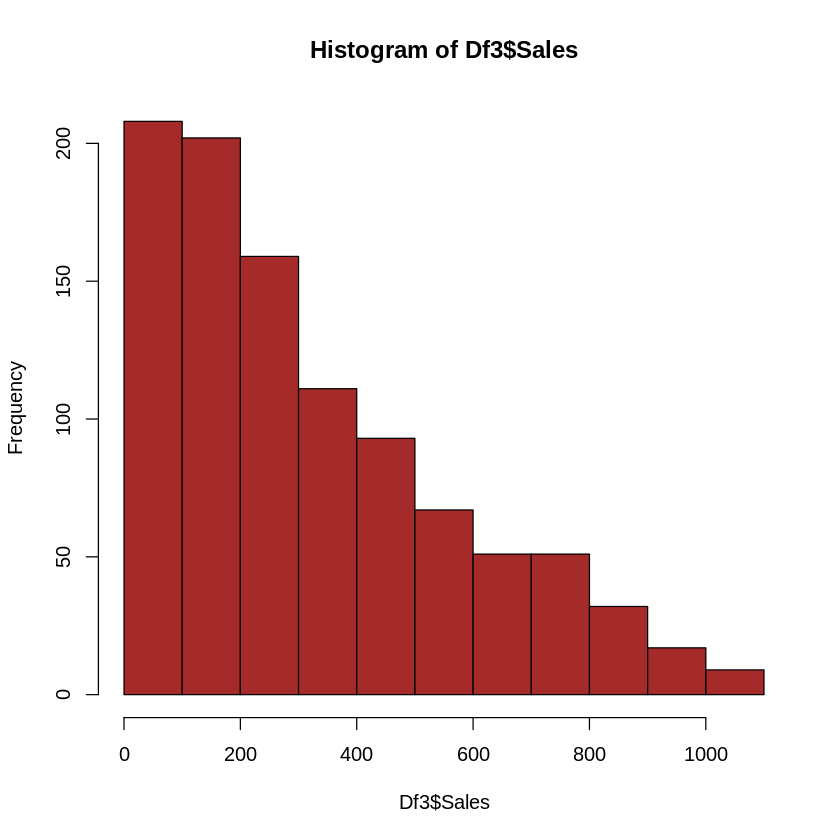

In [31]:
# check 'Sales' distribution
hist(Df3$Sales, col = 'brown')

In [21]:
str(Df3)

'data.frame':	1000 obs. of  2 variables:
 $ Date : Date, format: "2020-01-05" "2020-03-08" ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


In [22]:
# copy date and sales from df
test =Df3[,c("Date","Sales")]
str(test)

'data.frame':	1000 obs. of  2 variables:
 $ Date : Date, format: "2020-01-05" "2020-03-08" ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


In [23]:
# convert date to POCIXct type
test$Date <- as.POSIXct(test$Date)

In [24]:
# confirm change was successful
str(test)

'data.frame':	1000 obs. of  2 variables:
 $ Date : POSIXct, format: "2020-01-05" "2020-03-08" ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


# 7. Anomally Detection.

In [25]:
# load libraries
library(anomalize)
library(dplyr)
library(tibble)
Df3 <- test %>% as.tibble()

Warning message:
“`as.tibble()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Converting from tbl_df to tbl_time.
Auto-index message: index = Date

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 12 seconds

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 12 seconds

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



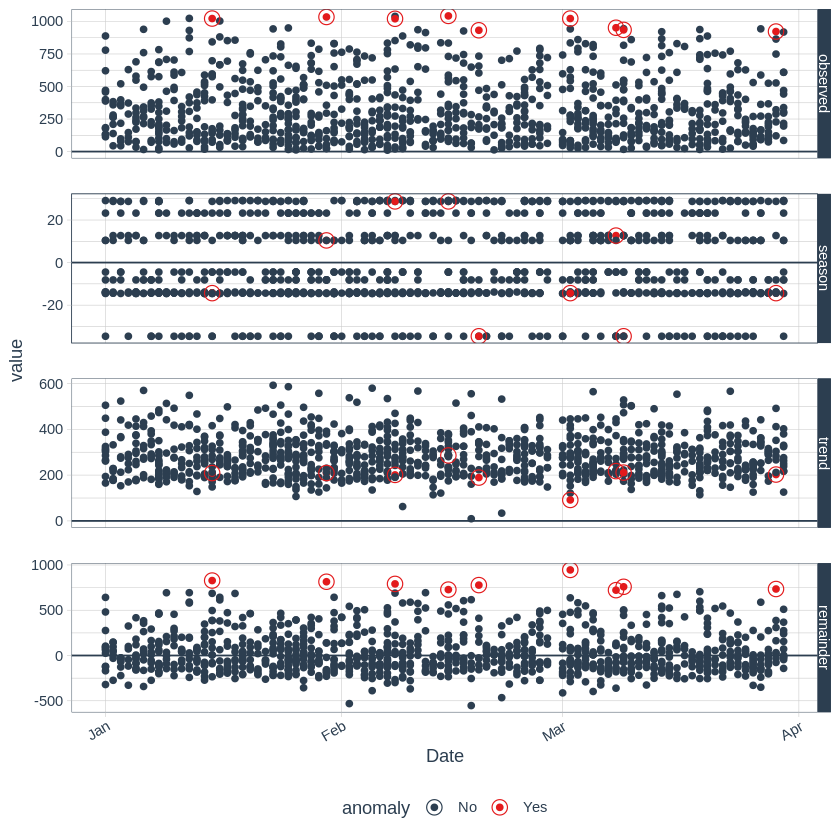

In [26]:
# find and plot anomalies in the data
Df3 %>%
  time_decompose(Sales, method = "stl",  frequency = "auto", trend = "auto") %>%  
  anomalize(remainder, method = "gesd", alpha = 0.05, max_anoms = 0.1) %>% 
  plot_anomaly_decomposition()

Converting from tbl_df to tbl_time.
Auto-index message: index = Date

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 12 seconds

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 12 seconds



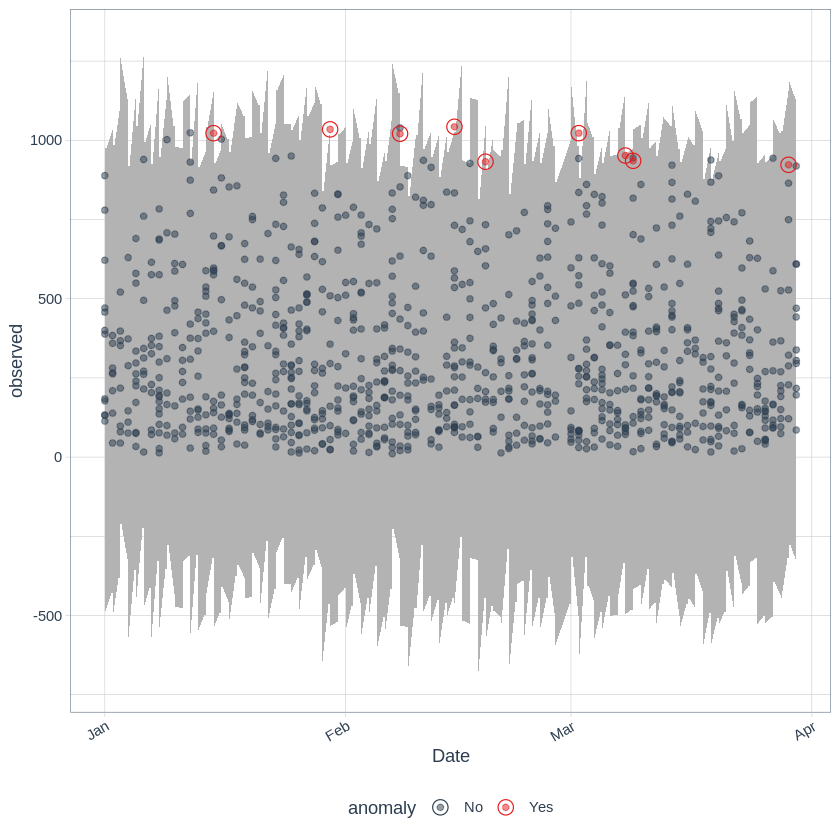

In [28]:
# plot the data again by recomposing the data
Df3 %>% 
  time_decompose(Sales, method = "stl",  frequency = "auto", trend = "auto") %>% 
  anomalize(remainder,  method = "gesd", alpha = 0.05, max_anoms = 0.1) %>%
  time_recompose() %>%  
  plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)

malies occurr above the 750 mark.

In [29]:
# find the anomalies
df_anoms = Df3 %>% 
  time_decompose(Sales, method = "stl",  frequency = "auto", trend = "auto") %>%  
  anomalize(remainder,  method = "gesd", alpha = 0.05, max_anoms = 0.1) %>%  
  time_recompose() %>%  
  filter(anomaly == 'Yes')

Converting from tbl_df to tbl_time.
Auto-index message: index = Date

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

frequency = 12 seconds

Note: Index not ordered. tibbletime assumes index is in ascending order. Results may not be as desired.

trend = 12 seconds



In [30]:
# display the anomalies
df_anoms

Date,observed,season,trend,remainder,remainder_l1,remainder_l2,anomaly,recomposed_l1,recomposed_l2
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2020-03-29,922.6350,-14.35919,202.50783,734.4864,-737.6286,714.2658,Yes,-549.4799,902.4144
2020-02-15,1042.6500,28.74450,286.02036,727.8851,-737.6286,714.2658,Yes,-422.8637,1029.0306
2020-02-08,1020.7050,28.74450,200.99541,790.9651,-737.6286,714.2658,Yes,-507.8886,944.0057
2020-03-08,951.8250,12.68236,217.46151,721.6811,-737.6286,714.2658,Yes,-507.4847,944.4096
2020-01-30,1034.4600,10.41401,209.27397,814.7720,-737.6286,714.2658,Yes,-517.9406,933.9538
2020-03-09,935.2665,-34.61636,211.01156,758.8713,-737.6286,714.2658,Yes,-561.2334,890.6610
2020-01-15,1022.3850,-14.35919,208.98314,827.7610,-737.6286,714.2658,Yes,-543.0046,908.8897
2020-02-19,932.3370,-34.61636,189.29105,777.6623,-737.6286,714.2658,Yes,-582.9539,868.9405
2020-03-02,1022.4900,-14.35919,91.57636,945.2728,-737.6286,714.2658,Yes,-660.4114,791.4829


In [32]:
# group and tally the number of transactions per day
market_count <- Df3 %>% group_by(Date) %>% tally()
colnames(market_count) <- c('Date', 'Count')
head(market_count)

Date,Count
<dttm>,<int>
2020-01-01,12
2020-01-02,8
2020-01-03,8
2020-01-04,6
2020-01-05,12
2020-01-06,9


Converting from tbl_df to tbl_time.
Auto-index message: index = Date

frequency = 7 days

trend = 30 days



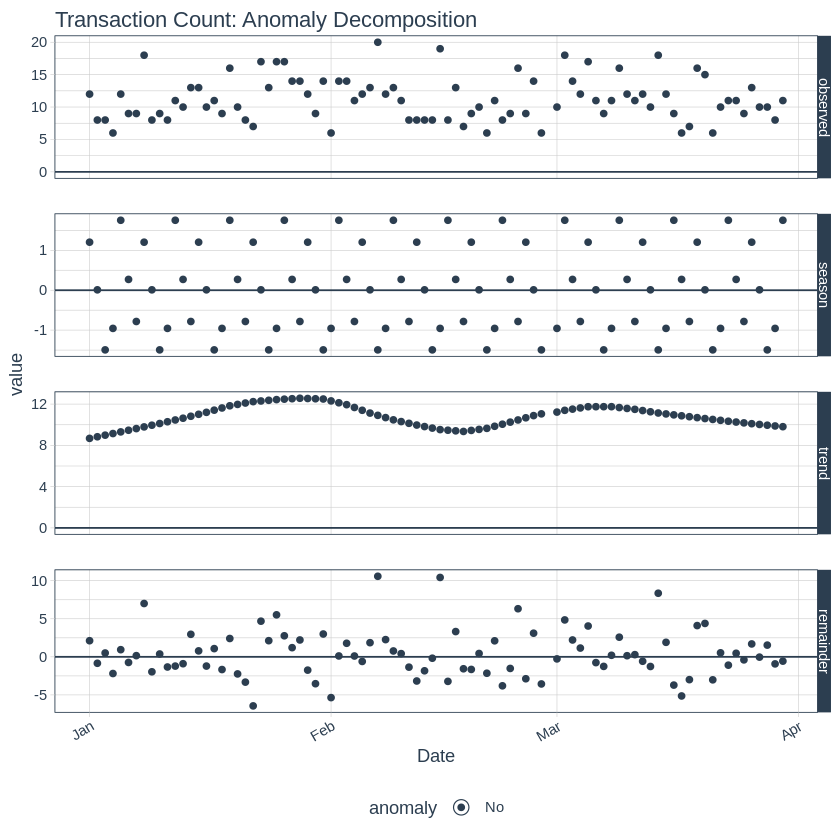

In [33]:
# visualize the data.
market_count %>%
    time_decompose(Count) %>%
    anomalize(remainder) %>%
    plot_anomaly_decomposition() +
    ggtitle("Transaction Count: Anomaly Decomposition")


Converting from tbl_df to tbl_time.
Auto-index message: index = Date

frequency = 7 days

trend = 30 days



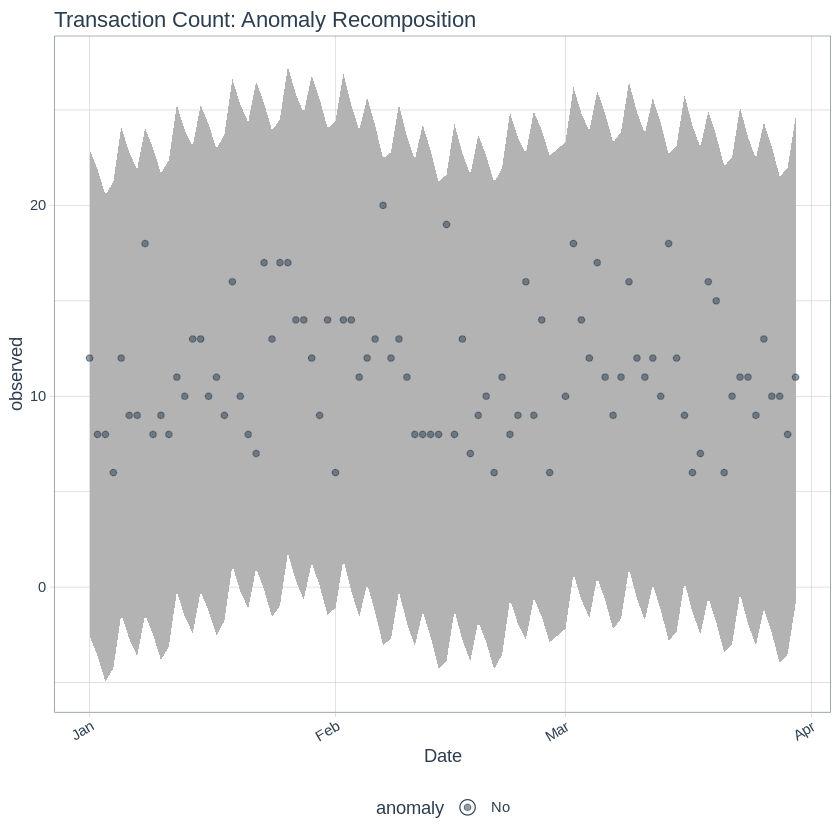

In [34]:

# visualize the data.
market_count %>%
    time_decompose(Count) %>%
    anomalize(remainder) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5) +
    ggtitle("Transaction Count: Anomaly Recomposition")

There are no notebale anomalies between January and April.

In [35]:
# group and tally the sum of transactions per day
market_total <- Df3 %>% 
  group_by(Date) %>% 
  summarise(Sales = sum(Sales))

head(market_total)


`summarise()` ungrouping output (override with `.groups` argument)



Date,Sales
<dttm>,<dbl>
2020-01-01,4745.181
2020-01-02,1945.503
2020-01-03,2078.128
2020-01-04,1623.688
2020-01-05,3536.684
2020-01-06,3614.205


Converting from tbl_df to tbl_time.
Auto-index message: index = Date

frequency = 7 days

trend = 30 days



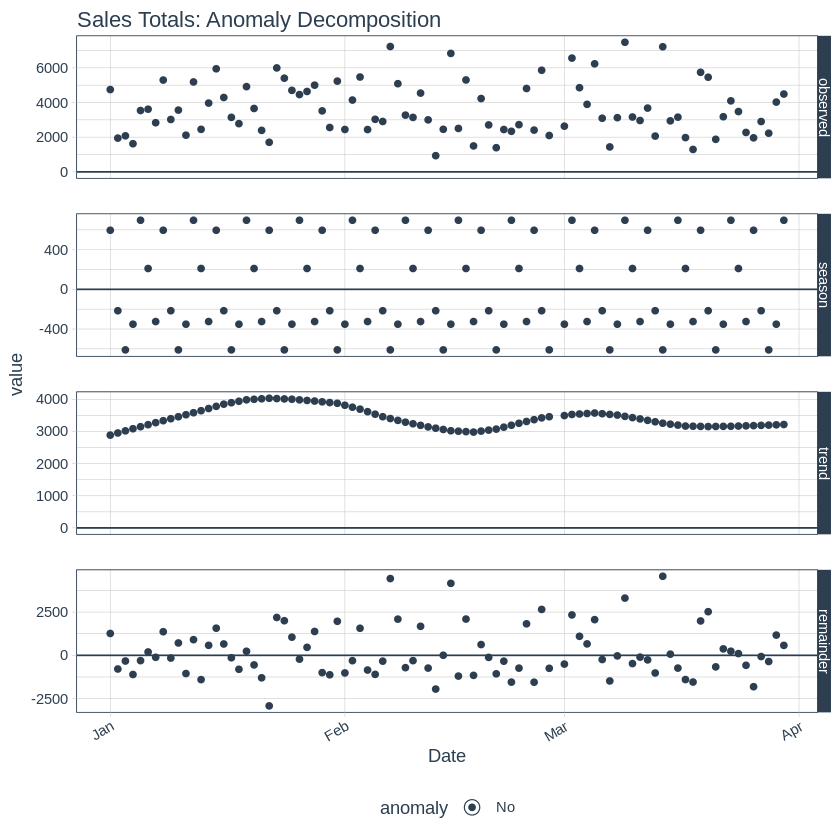

In [36]:
#visualize decomposed anomaly data
market_total %>%
    time_decompose(Sales, method = "stl", frequency = "auto", trend = "auto") %>%
    anomalize(remainder, method = "iqr", alpha = 0.05, max_anoms = 0.2) %>%
plot_anomaly_decomposition() +
    ggtitle("Sales Totals: Anomaly Decomposition")

Converting from tbl_df to tbl_time.
Auto-index message: index = Date

frequency = 7 days

trend = 30 days



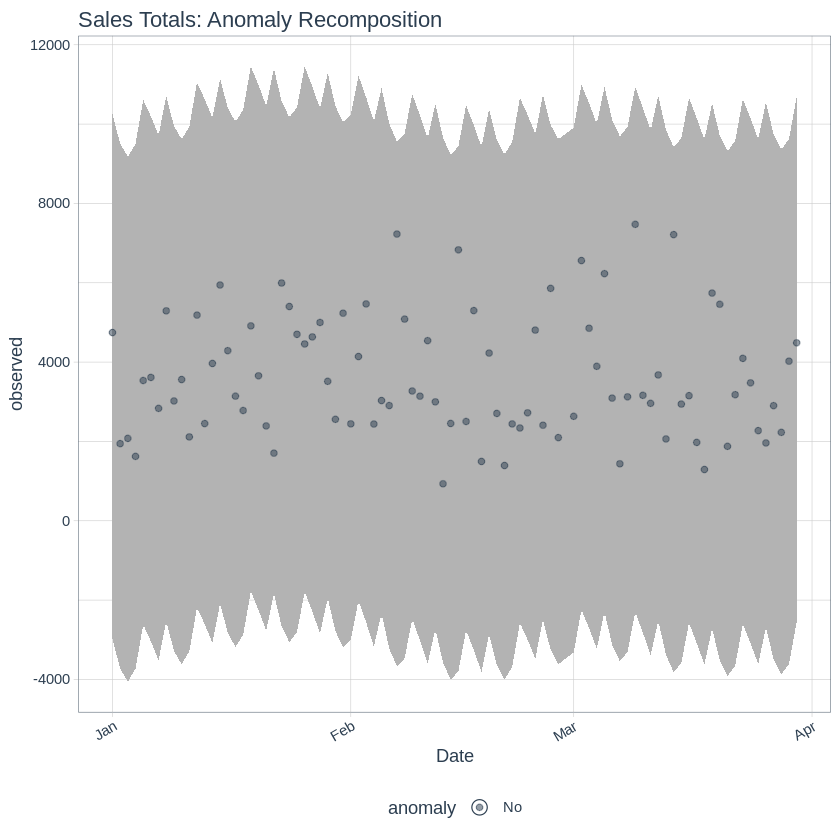

In [37]:

#visualize time recomposed anomaly data.
market_total %>%
    time_decompose(Sales, method = "stl", frequency = "auto", trend = "auto") %>%
    anomalize(remainder, method = "iqr", alpha = 0.05, max_anoms = 0.2) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5) +
    ggtitle("Sales Totals: Anomaly Recomposition")

There are no noteable transactions in daily transactions either. 

# 8. Conclusion.

We have seen that some anomalies in the dataset, however they occurr above a certain threshold and are seen to be minimal. Thia makes it easy to dismiss them and would therefore recommend trying diffrent methods to detect them.